In [1]:
import YahooFinance as yp
import matplotlib 
%matplotlib notebook
%matplotlib inline
import pandas as pd
import datetime 
import requests
from bs4 import BeautifulSoup as bs

In [7]:
yahoo = yp.YahooFinance()
dfx = yahoo.get_historical("GLD", "1970/01/01")

<RequestsCookieJar[<Cookie B=6474805f5ljrf&b=3&s=rm for .yahoo.com/>]>
Entries B 6474805f5ljrf&b=3&s=rm
I6oY/XR8glN <RequestsCookieJar[<Cookie B=6474805f5ljrf&b=3&s=rm for .yahoo.com/>]>


In [3]:
dfx = yahoo.get_historical("GOOG", "1970/01/01")
dfx_div = yahoo.get_historical_div("TQQQ", "1970/01/01")
dfx_split = yahoo.get_historical_split("TQQQ", "1970/01/01")
dfx_div_qqq = yahoo.get_historical_div("QQQ", "1970/01/01")

In [6]:
dfx_split

#pd.concat([dfx_div_qqq, dfx_div], axis=1)


,Date,Stock Splits,Symbol
0,2014-01-24,2:1,TQQQ
1,2012-05-11,2:1,TQQQ
2,2018-05-24,3:1,TQQQ
3,2011-02-25,2:1,TQQQ
4,2017-01-12,2:1,TQQQ


4.325503870106884
33.880720312536724


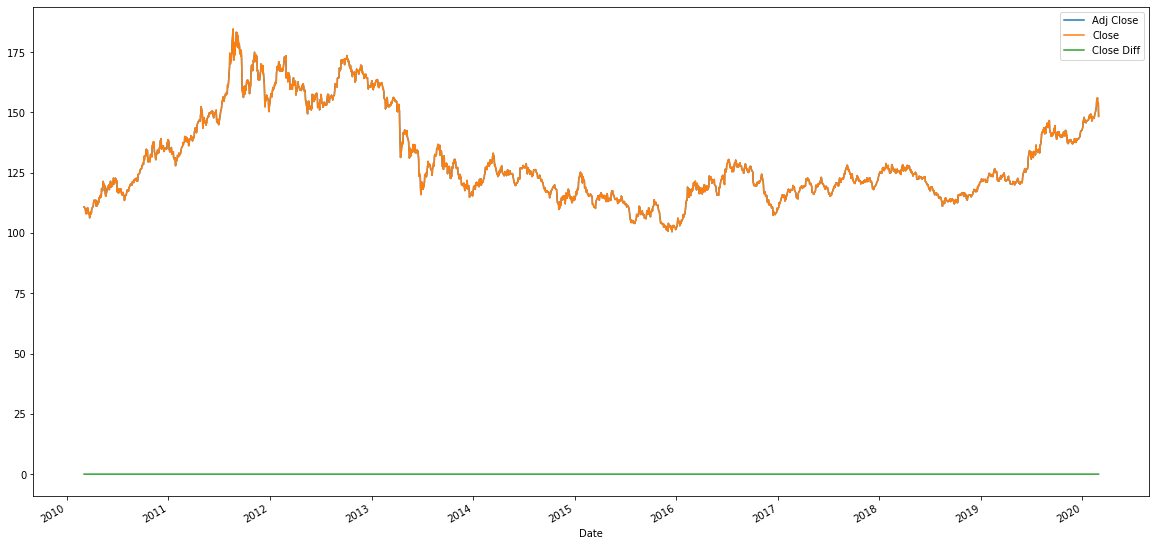

In [8]:
df = dfx

df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')

df = df.loc[df.index > pd.to_datetime(datetime.datetime.now()) - pd.Timedelta(str(10*365) + " days")]
#df['Adj Close'] = df['Adj Close'] *3
df.loc[:, 'prev']= df["Adj Close"].shift().bfill()
df.loc[:, 'ret'] = 1 + (df['Adj Close'] - df.prev)/df.prev
df.loc[:, 'cumret'] = df.ret.cumprod()
df.loc[:, 'Close Diff'] = df.Close - df['Adj Close']
df[['Adj Close', 'Close', 'Close Diff']].plot(figsize=(20,10))
print(((df.ret.prod() ** (365/df.shape[0])) - 1)*100)
print(((df.ret.prod() ** (df.shape[0]/df.shape[0])) - 1)*100)
#df


In [12]:
url = "https://finance.yahoo.com/quotes/AAPL,GOOG,AMAT,A,OEF,SPY/view/v1"
url ="https://finance.yahoo.com/quote/AAPL?p=AAPL"
cookies = {x.name: x.value for x in yahoo.cookies}
response=requests.get(url, cookies=cookies )

In [19]:
#<div class="Pos(r) " id="pf-detail-table"><div class="Ovx(a) Ovx(h)--print Ovy(h) "><table class="W(100%)"><thead><tr class="C($c-fuji-grey-j) BdB Bdbc($finLightGrayAlt)"><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h C(black) Fw(500) Ta(start) Start(0) Pend(10px) Pos(st) Bgc(white)  Ta(start)!"><span>Symbol</span><div class="W(3px) Pend(5px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n)"></div></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Last Price</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Change</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Chg %</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Currency</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Market Time</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Volume</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Shares</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Avg Vol (3m)</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Day Range</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>52-Wk Range</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Day Chart</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)!"><span>Market Cap</span></th><th class="Ta(end) Pstart(15px) Bgc(white) Fz(xs) Va(m) Py(5px)!  Cur(p) Bgc($extraLightBlue):h  Fw(400)! Us(n)"><span>Buy/Sell</span></th><th class="W(100%) Bgc(white)"></th></tr></thead><tbody><tr class="simpTblRow Bgc($extraLightBlue):h BdB Bdbc($finLightGrayAlt) Bdbc($tableBorderBlue):h H(32px) Bgc(white) "><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Start(0) Pend(10px) simpTblRow:h_Bgc($extraLightBlue)  Pos(st) Bgc(white)  Bgc(white)  Ta(start)! Fz(s)" aria-label="Symbol"><a href="/quote/AAPL?p=AAPL" title="Apple Inc." class="Fw(600)">AAPL</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)"></div></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Last Price"><span class="Trsdu(0.3s) ">273.36</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Change"><span class="Trsdu(0.3s) Fw(600) C($dataRed)">-0.16</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Chg %"><span class="Trsdu(0.3s) Fw(600) C($dataRed)">-0.06%</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Currency"><!-- react-text: 94 -->USD<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Time"><span class="Trsdu(0.3s) ">4:00PM EST</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Volume"><span class="Trsdu(0.3s) ">106.721M</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Shares"><!-- react-text: 100 -->-<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Avg Vol (3m)"><!-- react-text: 102 -->33.828M<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Range"><canvas width="210" height="34" style="width: 140px; height: 23px;"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="52-Wk Range"><canvas width="210" height="34" style="width: 140px; height: 23px;"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Chart"><a target="_blank" rel="noopener noreferrer" href="/chart/AAPL?p=AAPL" data-symbol="AAPL"><canvas style="width: 70px; height: 25px;" width="105" height="37"></canvas></a></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Cap"><span class="Trsdu(0.3s) ">1.196T</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Us(n) Fz(s)" aria-label="Buy/Sell"><div class="Pos(r) D(ib) D(n)--print Us(n)" data-test="fin-tradeit-container"><div class="D(ib)"><div class="Pos(r) D(ib) O(n):f W(100%) Cur(p)" tabindex="0"><span class="tradeButton Cur(p) Pos(r) Va(c) Fz(s) Bdrs(4px) Bdc($seperatorColor) Bds(s) Bdw(1px) Px(8px) Py(2px) C($linkColor) C(white):h Bgc(white) Bgc($linkColor):h"><div class="Pos(a) End(105%) Bgc(white) C($linkColor) T(-1px) V(h) Whs(nw) Bdrs(4px) Bxsh($boxAreaShadow) "><div class="Pos(a) T(6px) Start(100%) H(0) W(0) Bds(s) Bdstartw(5px) Bdstartc(white) Bdendc(t) Bdtc(t) Bdbc(t) Bdstartw(5px) Bdtw(5px) Bdbw(5px)"></div><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Buy</span></button><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Sell</span></button></div><span>Trade</span></span><!-- react-text: 295 --><!-- /react-text --></div></div></div></td><td class="W(100%)"></td></tr><tr class="simpTblRow Bgc($extraLightBlue):h BdB Bdbc($finLightGrayAlt) Bdbc($tableBorderBlue):h H(32px) Bgc($altRowColor) "><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Start(0) Pend(10px) simpTblRow:h_Bgc($extraLightBlue)  Pos(st) Bgc(white)  Bgc($altRowColor)  Ta(start)! Fz(s)" aria-label="Symbol"><a href="/quote/GOOG?p=GOOG" title="Alphabet Inc." class="Fw(600)">GOOG</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)"></div></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Last Price"><span class="Trsdu(0.3s) ">1,339.33</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Change"><span class="Trsdu(0.3s) Fw(600) C($dataGreen)">+21.24</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Chg %"><span class="Trsdu(0.3s) Fw(600) C($dataGreen)">+1.61%</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Currency"><!-- react-text: 126 -->USD<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Time"><span class="Trsdu(0.3s) ">4:00PM EST</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Volume"><span class="Trsdu(0.3s) ">3.791M</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Shares"><!-- react-text: 132 -->-<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Avg Vol (3m)"><!-- react-text: 134 -->1.592M<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Range"><canvas width="210" height="34" style="width: 140px; height: 23px;"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="52-Wk Range"><canvas style="width: 140px; height: 23px;" width="210" height="34"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Chart"><a target="_blank" rel="noopener noreferrer" href="/chart/GOOG?p=GOOG" data-symbol="GOOG"><canvas style="width: 70px; height: 25px;" width="105" height="37"></canvas></a></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Cap"><span class="Trsdu(0.3s) ">919.6B</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Us(n) Fz(s)" aria-label="Buy/Sell"><div class="Pos(r) D(ib) D(n)--print Us(n)" data-test="fin-tradeit-container"><div class="D(ib)"><div class="Pos(r) D(ib) O(n):f W(100%) Cur(p)" tabindex="0"><span class="tradeButton Cur(p) Pos(r) Va(c) Fz(s) Bdrs(4px) Bdc($seperatorColor) Bds(s) Bdw(1px) Px(8px) Py(2px) C($linkColor) C(white):h Bgc(white) Bgc($linkColor):h"><div class="Pos(a) End(105%) Bgc(white) C($linkColor) T(-1px) V(h) Whs(nw) Bdrs(4px) Bxsh($boxAreaShadow) "><div class="Pos(a) T(6px) Start(100%) H(0) W(0) Bds(s) Bdstartw(5px) Bdstartc(white) Bdendc(t) Bdtc(t) Bdbc(t) Bdstartw(5px) Bdtw(5px) Bdbw(5px)"></div><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Buy</span></button><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Sell</span></button></div><span>Trade</span></span><!-- react-text: 307 --><!-- /react-text --></div></div></div></td><td class="W(100%)"></td></tr><tr class="simpTblRow Bgc($extraLightBlue):h BdB Bdbc($finLightGrayAlt) Bdbc($tableBorderBlue):h H(32px) Bgc(white) "><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Start(0) Pend(10px) simpTblRow:h_Bgc($extraLightBlue)  Pos(st) Bgc(white)  Bgc(white)  Ta(start)! Fz(s)" aria-label="Symbol"><a href="/quote/AMAT?p=AMAT" title="Applied Materials, Inc." class="Fw(600)">AMAT</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)"></div></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Last Price"><span class="Trsdu(0.3s) ">58.12</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Change"><span class="Trsdu(0.3s) Fw(600) C($dataGreen)">+1.12</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Chg %"><span class="Trsdu(0.3s) Fw(600) C($dataGreen)">+1.96%</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Currency"><!-- react-text: 158 -->USD<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Time"><span class="Trsdu(0.3s) ">4:00PM EST</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Volume"><span class="Trsdu(0.3s) ">14.945M</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Shares"><!-- react-text: 164 -->-<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Avg Vol (3m)"><!-- react-text: 166 -->7.514M<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Range"><canvas style="width: 140px; height: 23px;" width="210" height="34"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="52-Wk Range"><canvas style="width: 140px; height: 23px;" width="210" height="34"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Chart"><a target="_blank" rel="noopener noreferrer" href="/chart/AMAT?p=AMAT" data-symbol="AMAT"><canvas style="width: 70px; height: 25px;" width="105" height="37"></canvas></a></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Cap"><span class="Trsdu(0.3s) ">53.372B</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Us(n) Fz(s)" aria-label="Buy/Sell"><div class="Pos(r) D(ib) D(n)--print Us(n)" data-test="fin-tradeit-container"><div class="D(ib)"><div class="Pos(r) D(ib) O(n):f W(100%) Cur(p)" tabindex="0"><span class="tradeButton Cur(p) Pos(r) Va(c) Fz(s) Bdrs(4px) Bdc($seperatorColor) Bds(s) Bdw(1px) Px(8px) Py(2px) C($linkColor) C(white):h Bgc(white) Bgc($linkColor):h"><div class="Pos(a) End(105%) Bgc(white) C($linkColor) T(-1px) V(h) Whs(nw) Bdrs(4px) Bxsh($boxAreaShadow) "><div class="Pos(a) T(6px) Start(100%) H(0) W(0) Bds(s) Bdstartw(5px) Bdstartc(white) Bdendc(t) Bdtc(t) Bdbc(t) Bdstartw(5px) Bdtw(5px) Bdbw(5px)"></div><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Buy</span></button><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Sell</span></button></div><span>Trade</span></span><!-- react-text: 319 --><!-- /react-text --></div></div></div></td><td class="W(100%)"></td></tr><tr class="simpTblRow Bgc($extraLightBlue):h BdB Bdbc($finLightGrayAlt) Bdbc($tableBorderBlue):h H(32px) Bgc($altRowColor) "><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Start(0) Pend(10px) simpTblRow:h_Bgc($extraLightBlue)  Pos(st) Bgc(white)  Bgc($altRowColor)  Ta(start)! Fz(s)" aria-label="Symbol"><a href="/quote/A?p=A" title="Agilent Technologies, Inc." class="Fw(600)">A</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)"></div></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Last Price"><span class="Trsdu(0.3s) ">77.07</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Change"><span class="Trsdu(0.3s) Fw(600) C($dataRed)">-0.36</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Chg %"><span class="Trsdu(0.3s) Fw(600) C($dataRed)">-0.46%</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Currency"><!-- react-text: 190 -->USD<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Time"><span class="Trsdu(0.3s) ">4:04PM EST</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Volume"><span class="Trsdu(0.3s) ">3.617M</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Shares"><!-- react-text: 196 -->-<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Avg Vol (3m)"><!-- react-text: 198 -->1.877M<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Range"><canvas style="width: 140px; height: 23px;" width="210" height="34"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="52-Wk Range"><canvas style="width: 140px; height: 23px;" width="210" height="34"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Chart"><a target="_blank" rel="noopener noreferrer" href="/chart/A?p=A" data-symbol="A"><canvas style="width: 70px; height: 25px;" width="105" height="37"></canvas></a></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Cap"><span class="Trsdu(0.3s) ">23.892B</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Us(n) Fz(s)" aria-label="Buy/Sell"><div class="Pos(r) D(ib) D(n)--print Us(n)" data-test="fin-tradeit-container"><div class="D(ib)"><div class="Pos(r) D(ib) O(n):f W(100%) Cur(p)" tabindex="0"><span class="tradeButton Cur(p) Pos(r) Va(c) Fz(s) Bdrs(4px) Bdc($seperatorColor) Bds(s) Bdw(1px) Px(8px) Py(2px) C($linkColor) C(white):h Bgc(white) Bgc($linkColor):h"><div class="Pos(a) End(105%) Bgc(white) C($linkColor) T(-1px) V(h) Whs(nw) Bdrs(4px) Bxsh($boxAreaShadow) "><div class="Pos(a) T(6px) Start(100%) H(0) W(0) Bds(s) Bdstartw(5px) Bdstartc(white) Bdendc(t) Bdtc(t) Bdbc(t) Bdstartw(5px) Bdtw(5px) Bdbw(5px)"></div><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Buy</span></button><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Sell</span></button></div><span>Trade</span></span><!-- react-text: 331 --><!-- /react-text --></div></div></div></td><td class="W(100%)"></td></tr><tr class="simpTblRow Bgc($extraLightBlue):h BdB Bdbc($finLightGrayAlt) Bdbc($tableBorderBlue):h H(32px) Bgc(white) "><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Start(0) Pend(10px) simpTblRow:h_Bgc($extraLightBlue)  Pos(st) Bgc(white)  Bgc(white)  Ta(start)! Fz(s)" aria-label="Symbol"><a href="/quote/OEF?p=OEF" title="iShares S&amp;P 100 ETF" class="Fw(600)">OEF</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)"></div></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Last Price"><span class="Trsdu(0.3s) ">132.86</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Change"><span class="Trsdu(0.3s) Fw(600) C($dataRed)">-0.43</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Chg %"><span class="Trsdu(0.3s) Fw(600) C($dataRed)">-0.32%</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Currency"><!-- react-text: 222 -->USD<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Time"><span class="Trsdu(0.3s) ">4:00PM EST</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Volume"><span class="Trsdu(0.3s) ">2.28M</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Shares"><!-- react-text: 228 -->-<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Avg Vol (3m)"><!-- react-text: 230 -->427,140<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Range"><canvas style="width: 140px; height: 23px;" width="210" height="34"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="52-Wk Range"><canvas style="width: 140px; height: 23px;" width="210" height="34"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Chart"><a target="_blank" rel="noopener noreferrer" href="/chart/OEF?p=OEF" data-symbol="OEF"><canvas style="width: 70px; height: 25px;" width="105" height="37"></canvas></a></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Cap"><span class="Trsdu(0.3s) ">5.182B</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Us(n) Fz(s)" aria-label="Buy/Sell"><div class="Pos(r) D(ib) D(n)--print Us(n)" data-test="fin-tradeit-container"><div class="D(ib)"><div class="Pos(r) D(ib) O(n):f W(100%) Cur(p)" tabindex="0"><span class="tradeButton Cur(p) Pos(r) Va(c) Fz(s) Bdrs(4px) Bdc($seperatorColor) Bds(s) Bdw(1px) Px(8px) Py(2px) C($linkColor) C(white):h Bgc(white) Bgc($linkColor):h"><div class="Pos(a) End(105%) Bgc(white) C($linkColor) T(-1px) V(h) Whs(nw) Bdrs(4px) Bxsh($boxAreaShadow) "><div class="Pos(a) T(6px) Start(100%) H(0) W(0) Bds(s) Bdstartw(5px) Bdstartc(white) Bdendc(t) Bdtc(t) Bdbc(t) Bdstartw(5px) Bdtw(5px) Bdbw(5px)"></div><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Buy</span></button><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Sell</span></button></div><span>Trade</span></span><!-- react-text: 343 --><!-- /react-text --></div></div></div></td><td class="W(100%)"></td></tr><tr class="simpTblRow Bgc($extraLightBlue):h BdB Bdbc($finLightGrayAlt) Bdbc($tableBorderBlue):h H(32px) Bgc($altRowColor) "><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Start(0) Pend(10px) simpTblRow:h_Bgc($extraLightBlue)  Pos(st) Bgc(white)  Bgc($altRowColor)  Ta(start)! Fz(s)" aria-label="Symbol"><a href="/quote/SPY?p=SPY" title="SPDR S&amp;P 500 ETF Trust" class="Fw(600)">SPY</a><div class="W(3px) Pos(a) Start(100%) T(0) H(100%) Bg($pfColumnFakeShadowGradient) Pe(n) Pend(5px)"></div></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Last Price"><span class="Trsdu(0.3s) ">296.24</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Change"><span class="Trsdu(0.3s) Fw(600) C($dataRed)">-1.27</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fw(600) Fz(s)" aria-label="Chg %"><span class="Trsdu(0.3s) Fw(600) C($dataRed)">-0.43%</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Currency"><!-- react-text: 254 -->USD<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Time"><span class="Trsdu(0.3s) ">4:00PM EST</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Volume"><span class="Trsdu(0.3s) ">385.764M</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Shares"><!-- react-text: 260 -->-<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Avg Vol (3m)"><!-- react-text: 262 -->77.809M<!-- /react-text --></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Range"><canvas style="width: 140px; height: 23px;" width="210" height="34"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="52-Wk Range"><canvas style="width: 140px; height: 23px;" width="210" height="34"></canvas></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Day Chart"><a target="_blank" rel="noopener noreferrer" href="/chart/SPY?p=SPY" data-symbol="SPY"><canvas style="width: 70px; height: 25px;" width="105" height="37"></canvas></a></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Fz(s)" aria-label="Market Cap"><span class="Trsdu(0.3s) ">271.884B</span></td><td colspan="" class="Va(m) Whs(nw) Ta(end) Pstart(15px) Us(n) Fz(s)" aria-label="Buy/Sell"><div class="Pos(r) D(ib) D(n)--print Us(n)" data-test="fin-tradeit-container"><div class="D(ib)"><div class="Pos(r) D(ib) O(n):f W(100%) Cur(p)" tabindex="0"><span class="tradeButton Cur(p) Pos(r) Va(c) Fz(s) Bdrs(4px) Bdc($seperatorColor) Bds(s) Bdw(1px) Px(8px) Py(2px) C($linkColor) C(white):h Bgc(white) Bgc($linkColor):h"><div class="Pos(a) End(105%) Bgc(white) C($linkColor) T(-1px) V(h) Whs(nw) Bdrs(4px) Bxsh($boxAreaShadow) "><div class="Pos(a) T(6px) Start(100%) H(0) W(0) Bds(s) Bdstartw(5px) Bdstartc(white) Bdendc(t) Bdtc(t) Bdbc(t) Bdstartw(5px) Bdtw(5px) Bdbw(5px)"></div><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Buy</span></button><button class="Fz(s) D(ib) Cur(p) Py(2px) Px(15px) C($linkColor) C(white):h Bgc($linkColor):h Bdrs(4px)"><span>Sell</span></button></div><span>Trade</span></span><!-- react-text: 355 --><!-- /react-text --></div></div></div></td><td class="W(100%)"></td></tr></tbody></table></div><div class="W(3px) Pos(a) End(0) T(0) H(100%) Z(2) Bg($pfColumnFakeShadowGradientReverse) Pe(n)"></div></div>
parser = bs(response.text, 'html.parser')
#div = parser.find("div", {"id": "pf-detail-table"})
div = parser.find("div", {"id": "quote-header-info"})
spans = div.findAll("span")
spans[1].string



#yahoo.get_details("AAPL")

'273.36'

In [6]:
#yahoo.get_details("AAPL")
yahoo.summary

{'PREV_CLOSE-value': '273.52',
 'OPEN-value': '257.26',
 'BID-value': '274.91 x 800',
 'ASK-value': '276.09 x 800',
 'TD_VOLUME-value': '106,721,230',
 'AVERAGE_VOLUME_3MONTH-value': '33,827,658',
 'MARKET_CAP-value': '1.196T',
 'BETA_5Y-value': '1.28',
 'PE_RATIO-value': '21.70',
 'EARNINGS_DATE-value': 'Apr 27, 2020',
 'ONE_YEAR_TARGET_PRICE-value': '333.26',
 'EX_DIVIDEND_DATE-value': 'Feb 06, 2020',
 'DAYS_RANGE-value': '256.37 - 278.41',
 'FIFTY_TWO_WK_RANGE-value': '169.50 - 327.85',
 'DIVIDEND_AND_YIELD-value': '3.08 (1.13%)',
 'LAST_PRICE': 273.36}